#### Figure S6 (in the SI)

This figure tries to illustrate cumulative dust recovered after several extraction cycles from the same filter does not majroly differ from the dust recoverted after only one extraction cycle. In other words, the mutiple extraction cycle will make a representative and homogenous recovery.

Plot type: Line plot.

In [8]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

df = pd.read_excel(r'artl_v_psd_master.xlsx')
col_list_all = list(df.columns)
df_select = df[['Size'] + [col for col in col_list_all if ('_010' in col) & ('_hd' in col) & (('_mean' in col)|('_min' in col)|('_max' in col))]]

# one cycle
df_select.iloc[:,3] = df_select.iloc[:,1] - df_select.iloc[:,3]
df_select.iloc[:,5] = df_select.iloc[:,5] - df_select.iloc[:,1]

# seven cycles
df_select.iloc[:,4] = df_select.iloc[:,2] - df_select.iloc[:,4]
df_select.iloc[:,6] = df_select.iloc[:,6] - df_select.iloc[:,2]

C:\Users\alima\anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [5]:
df_select.iloc[14:,].head()

,Size,Eval_010_iso2_11e_hd_180326_am_mean,Eval_010_iso2_11e_hd_180326_am_r2_mean,Eval_010_iso2_11e_hd_180326_am_min,Eval_010_iso2_11e_hd_180326_am_r2_min,Eval_010_iso2_11e_hd_180326_am_max,Eval_010_iso2_11e_hd_180326_am_r2_max
14,0.501,0.050,0.060,0.000000e+00,0.000,0.000000e+00,0.000
15,0.562,0.210,0.240,0.000000e+00,0.000,0.000000e+00,0.000
16,0.631,0.460,0.500,5.551115e-17,0.000,-5.551115e-17,0.000
17,0.708,0.734,0.782,4.000000e-03,0.002,6.000000e-03,0.008
18,0.794,0.976,1.024,6.000000e-03,0.004,4.000000e-03,0.006


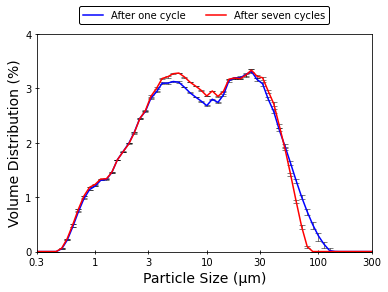

In [6]:
plt.figure()
plt.errorbar(df['Size'], df_select.iloc[:,1], yerr = [df_select.iloc[:,3],df_select.iloc[:,5]], 
             xerr = None, capsize = 3, c = "b", ecolor = 'black', elinewidth = 0.5, capthick = 0.5, label = 'After one cycle')

plt.errorbar(df['Size'], df_select.iloc[:,2], yerr = [df_select.iloc[:,4],df_select.iloc[:,6]], 
            xerr = None, capsize = 3, c = "r", ecolor = 'black', elinewidth = 0.5, capthick = 0.5, label = 'After seven cycles')

plt.xscale('log')

plt.xlim(0.3, 300)
a = [0.3, 1, 3, 10, 30, 100, 300]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 4)
plt.yticks(np.arange(0, 5, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 9, ncol = 2, frameon = True, edgecolor = 'black', framealpha=1, bbox_to_anchor=(0.5, 1.15))
plt.savefig(r'FigureS6.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code